<a href="https://colab.research.google.com/github/AbidMorshed/CAES-system/blob/main/4_Compressor_5_Turbine_CAES_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyromat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyromat as pm 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
air=pm.get('ig.air')
pm.config
Ta=273
L=1.3
P_drop=0.0005*L

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

###**Compressor Function**

In [ ]:
#rc=compression ratio 
#T_in=inlet temperature  
#P_in=inlet pressure 
def compressor (T_in,P_in,rc):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.91-((rc-1)/300)  #n_pol=polytropic index
  n=gamma*n_pol/(gamma*n_pol-gamma+1)                
  P_out=rc*P_in
  T_out=T_in*pow(rc,((n-1)/n))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wc=h_out-h_in
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wc, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wc,ed))

##**Turbine Function**

In [ ]:
def turbine (T_in,P_in,rt):
  T_in=T_in+273
  gamma=(air.cp(T_in,P_in)/air.cv(T_in,P_in))
  n_pol=0.90-(rt-1)/250
  P_out=P_in/rt
  n=1/(1-((n_pol*(gamma-1))/gamma))
  T_out=T_in/(pow(rt,((n-1)/n)))
  h_in=air.h(T_in,P_in)
  h_out=air.h(T_out,P_out)
  s_in=air.s(T_in,P_in)
  s_out=air.s(T_out,P_out)
  wt=h_in-h_out
  ed=-Ta*(s_in-s_out)
  T_out=T_out-273
  return T_out, P_out, wt, ed
  print('Outlet temperature is %0.3f \nOutlet Pressure is %0.3f \nwork output= %0.3f \nexergy destruction is %0.3f'%(T_out,P_out,wt,ed))

###**Point 1-9 (Compressor)**

In [ ]:
rc=[6,4.5,2.5,2]
rt=[1.54,2.22,2.7,3.33,1.74]
#compressor 1
#point 1
Tc1,Pc1=[25,1.013]
#compressor 1 outlet
#point 2 
Tc2, Pc2, wc1, ex_dc1=compressor (Tc1,Pc1,rc[0])
#compressor 2 inlet (assumed)
#point 3
Tc3,Pc3=[68.08,Pc2-P_drop]
#compressor 2 outlet
#point 4
Tc4, Pc4, wc2, ex_dc2=compressor (Tc3,Pc3,rc[1])
#compressor 3 inlet (assumed)
#point 5
Tc5,Pc5=[67.13,Pc4-P_drop]
#compressor 3 outlet
#point 6
Tc6, Pc6, wc3, ex_dc3=compressor (Tc5,Pc5,rc[2])
#compressor 4 inlet (assumed)
#point 7
Tc7,Pc7=[68.60,Pc6-P_drop]
#compressor 4 outlet
#point 8
Tc8, Pc8, wc4, ex_dc4=compressor (Tc7,Pc7,rc[3])
#point 9 (assumed)
Tc9,Pc9=[68.52,Pc8-P_drop]

#Exergy destruction in pcm
#table
dfc=pd.DataFrame()
for i in range (1,10):
  dfc.loc[i,['point','Temperature','Pressure']]=i,globals()['Tc'+str(i)],globals()['Pc'+str(i)]

display(dfc)
dfwc=pd.DataFrame()
for i in range (1,5):
  dfwc.loc[i,['Compressor no','Work done','Exergy Destruction']]=i,globals()['wc'+str(i)],globals()['ex_dc'+str(i)]
display(dfwc)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
1,1.0,25.000000,1.013000
2,2.0,255.545841,6.078000
3,3.0,68.080000,6.077350
4,4.0,276.494436,27.348075
5,5.0,67.130000,27.347425
6,6.0,180.833310,68.368562
7,7.0,68.600000,68.367912
8,8.0,151.698435,136.735825
9,9.0,68.520000,136.735175


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,Compressor no,Work done,Exergy Destruction
1,1.0,234.536493,18.509700
2,2.0,212.924576,14.975522
3,3.0,115.312548,8.015845
4,4.0,84.122207,5.845916


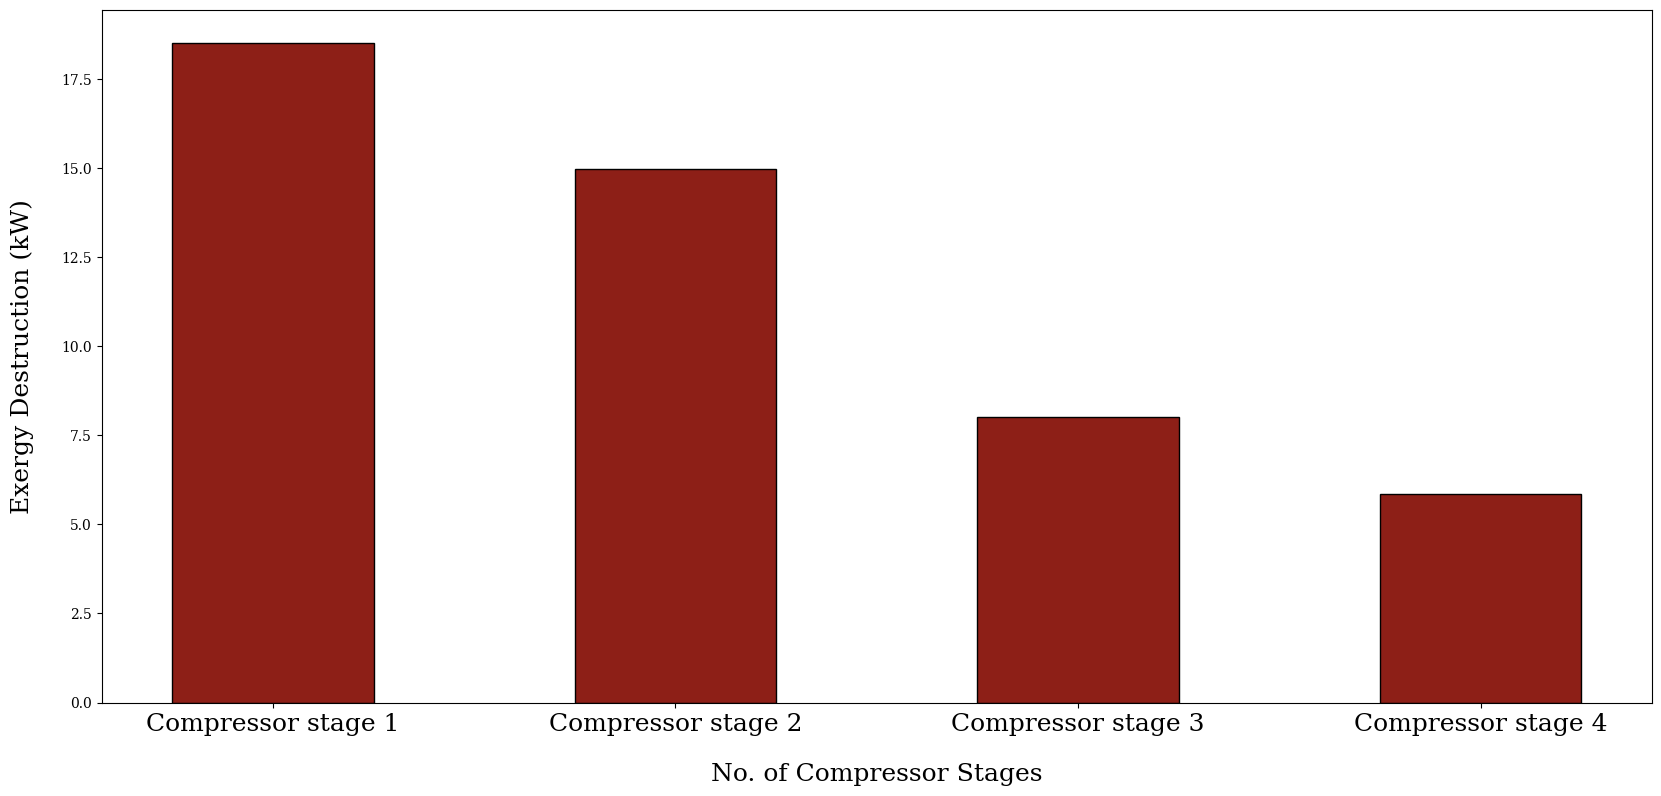

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1','Compressor stage 2','Compressor stage 3','Compressor stage 4'],fontsize=18)

plt.xlabel('No. of Compressor Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18, labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Compressor.jpg')

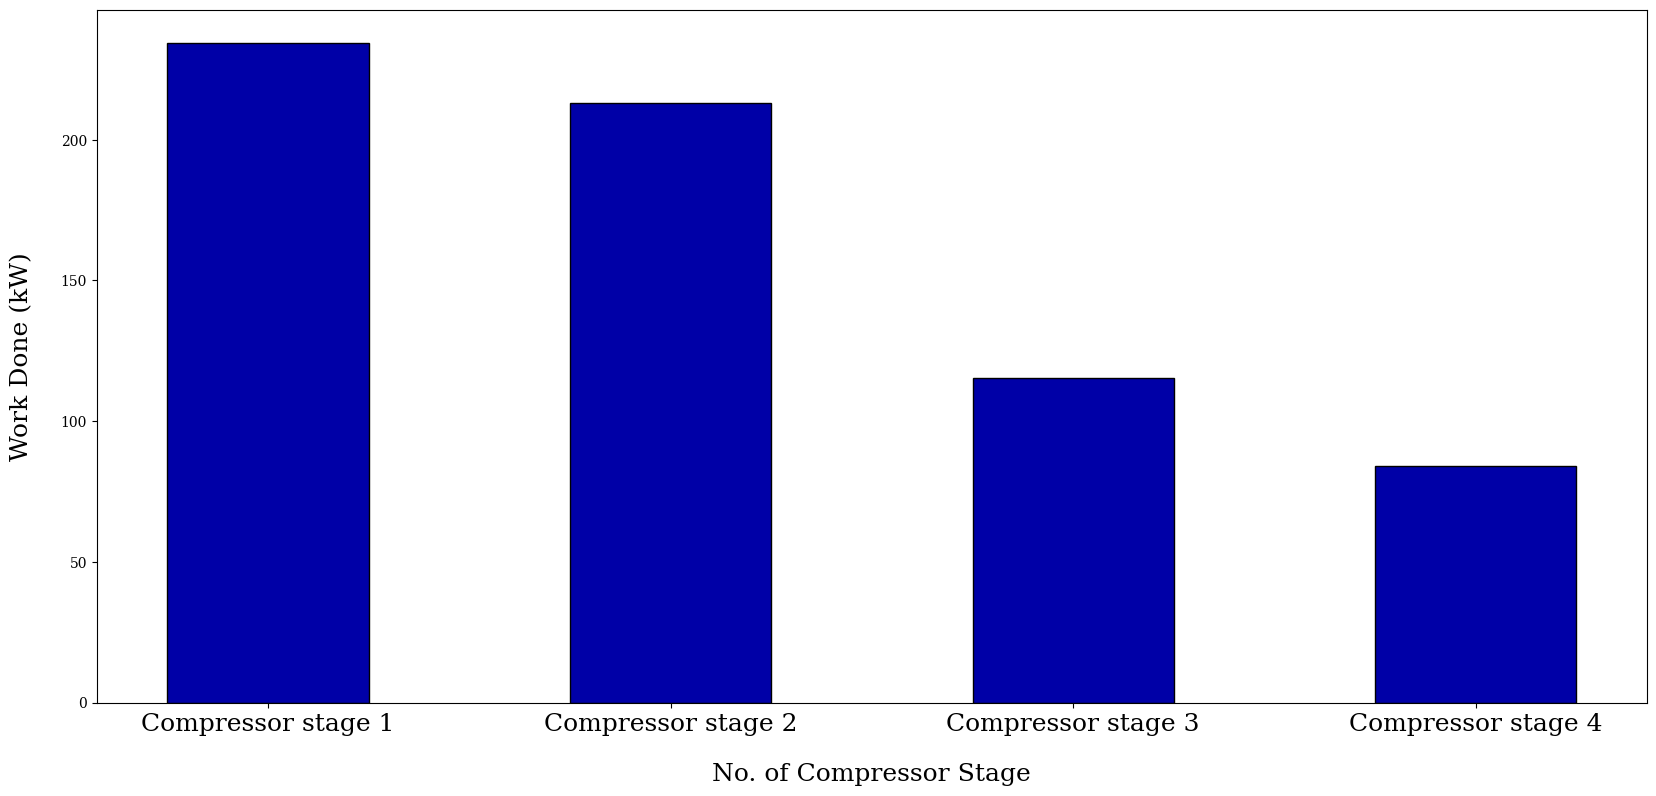

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwc['Compressor no'], height=dfwc['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work Done by Compressor',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwc['Compressor no'])
ax1.set_xticklabels(['Compressor stage 1','Compressor stage 2','Compressor stage 3','Compressor stage 4'],fontsize=18)

plt.xlabel('No. of Compressor Stage',fontsize=18,labelpad=20)
plt.ylabel('Work Done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Compressor.jpg')

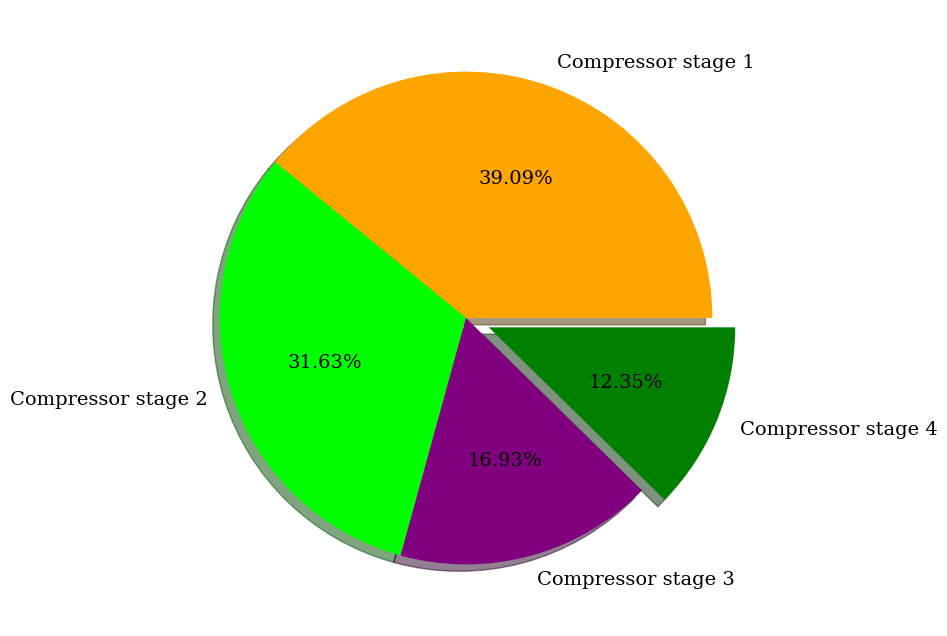

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(dfwc['Exergy Destruction'], autopct='%0.2f%%', explode=(0,0,0,0.1), labels=['Compressor stage 1','Compressor stage 2','Compressor stage 3','Compressor stage 4'], colors=['orange','lime','purple','green'], textprops={'fontsize':14},shadow=True  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Compressor Pie.png')
plt.show()

###**Point 10-12(Cavern & Throttle Valve)**

In [ ]:
#Cavern
T10,P10=[Tc9,0.95*Pc9]

#cavern outlet
h_cavern=air.h(T10+273,P10)
h_cavern_outlet=.9*h_cavern[0]

T_outlet=T10+(h_cavern_outlet-h_cavern)/air.cp(T10+273)  #delh=m Cp delT

T11,P11=[T_outlet,120.824]

#Throttle valve
#point 12
T12,P12=[58.90,60.41]

#Exergy destruction of Throttle Valve
ex_dth=(air.s(T12+273,P12)-air.s(T11+273,P11))*Ta
display(ex_dth)
dfcv=pd.DataFrame()
for i in range (10,13):
  dfcv.loc[i,['point','Temperature','Pressure']]=i,globals()['T'+str(i)],globals()['P'+str(i)]
dfcv

array([49.62782786])

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,point,Temperature,Pressure
10,10.0,68.520000,129.898416
11,11.0,64.613505,120.824000
12,12.0,58.900000,60.410000


###**Point 12-21 (Turbine)**

In [ ]:
rc=[6,4.5,2.5,2]
rt=[1.54,2.22,2.7,3.33,1.74]
#turbine 1
#point 12
Tt12,Pt12=[58.90,60.41]
#turbine 1 outlet
#point 13 
Tt13, Pt13, wt1, ex_dt1=turbine (Tt12,Pt12,rt[0])
#turbine 2 inlet (assumed)
#point 14
Tt14,Pt14=[100.67,Pt13-P_drop]
#turbine 2 outlet
#point 15
Tt15, Pt15, wt2, ex_dt2=turbine (Tt14,Pt14,rt[1])
#turbine 3 inlet (assumed)
#point 16
Tt16,Pt16=[127.13,Pt15-P_drop]
#turbine 3 outlet
#point 17
Tt17, Pt17, wt3, ex_dt3=turbine (Tt16,Pt16,rt[2])
#turbine 4 inlet (assumed)
#point 18
Tt18,Pt18=[221.1,Pt17-P_drop]
#turbine 19 outlet
#point 19
Tt19, Pt19, wt4, ex_dt4=turbine (Tt18,Pt18,rt[3])
#turbine 5 inlet(assumed)
#point 20
Tt20,Pt20=[192.94,Pt19-P_drop]
#turbine 21 outlet
#point 21
Tt21, Pt21, wt5, ex_dt5=turbine (Tt20,Pt20,rt[4])


#table
dft=pd.DataFrame()
for i in range (13,22):
  dft.loc[i,['point','Temperature','Pressure']]=i,globals()['Tt'+str(i)],globals()['Pt'+str(i)]

display(dft)
dfwt=pd.DataFrame()
for i in range (1,6):
  dfwt.loc[i,['Turbine no','Work done','Exergy Destruction']]=i,globals()['wt'+str(i)],globals()['ex_dt'+str(i)]
dfwt

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,point,Temperature,Pressure
13,13.0,24.177693,39.227273
14,14.0,100.670000,39.226623
15,15.0,32.117378,17.669650
16,16.0,127.130000,17.669000
17,17.0,38.279527,6.544074
18,18.0,221.100000,6.543424
19,19.0,93.423858,1.964992
20,20.0,192.940000,1.964342
21,21.0,132.356054,1.128932


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant 

,Turbine no,Work done,Exergy Destruction
1,1.0,34.923224,3.495442
2,2.0,69.088370,6.739357
3,3.0,89.686527,8.654098
4,4.0,130.069223,11.166689
5,5.0,61.748717,4.651864


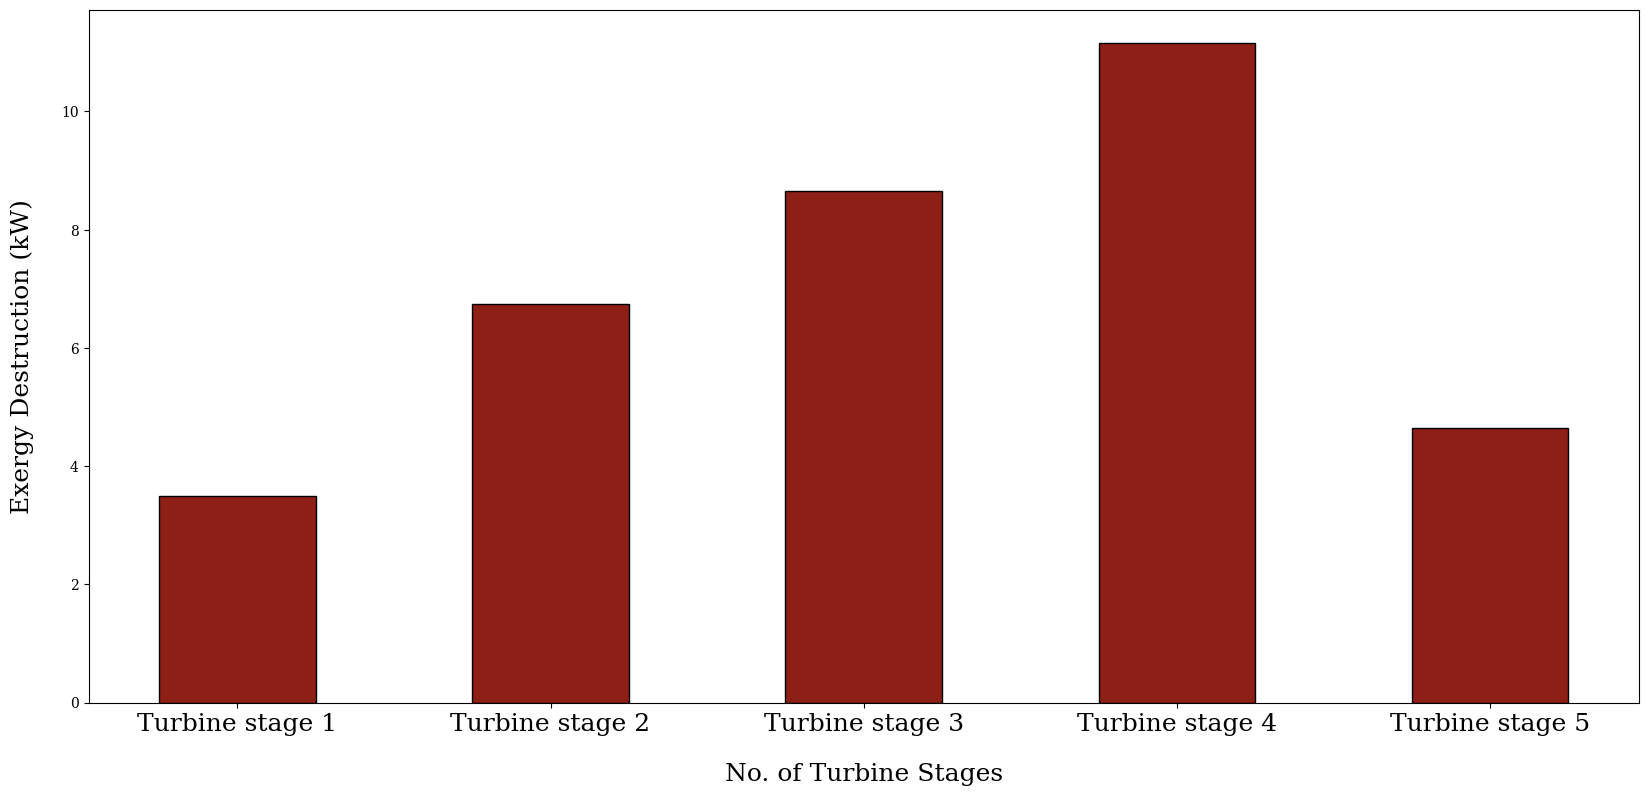

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Exergy Destruction'],color='#8d1f17',edgecolor='black',width=0.5 )
# plt.title('Exergy Destruction of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4','Turbine stage 5'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Exergy Destruction (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Exergy Destruction of Turbine.jpg')

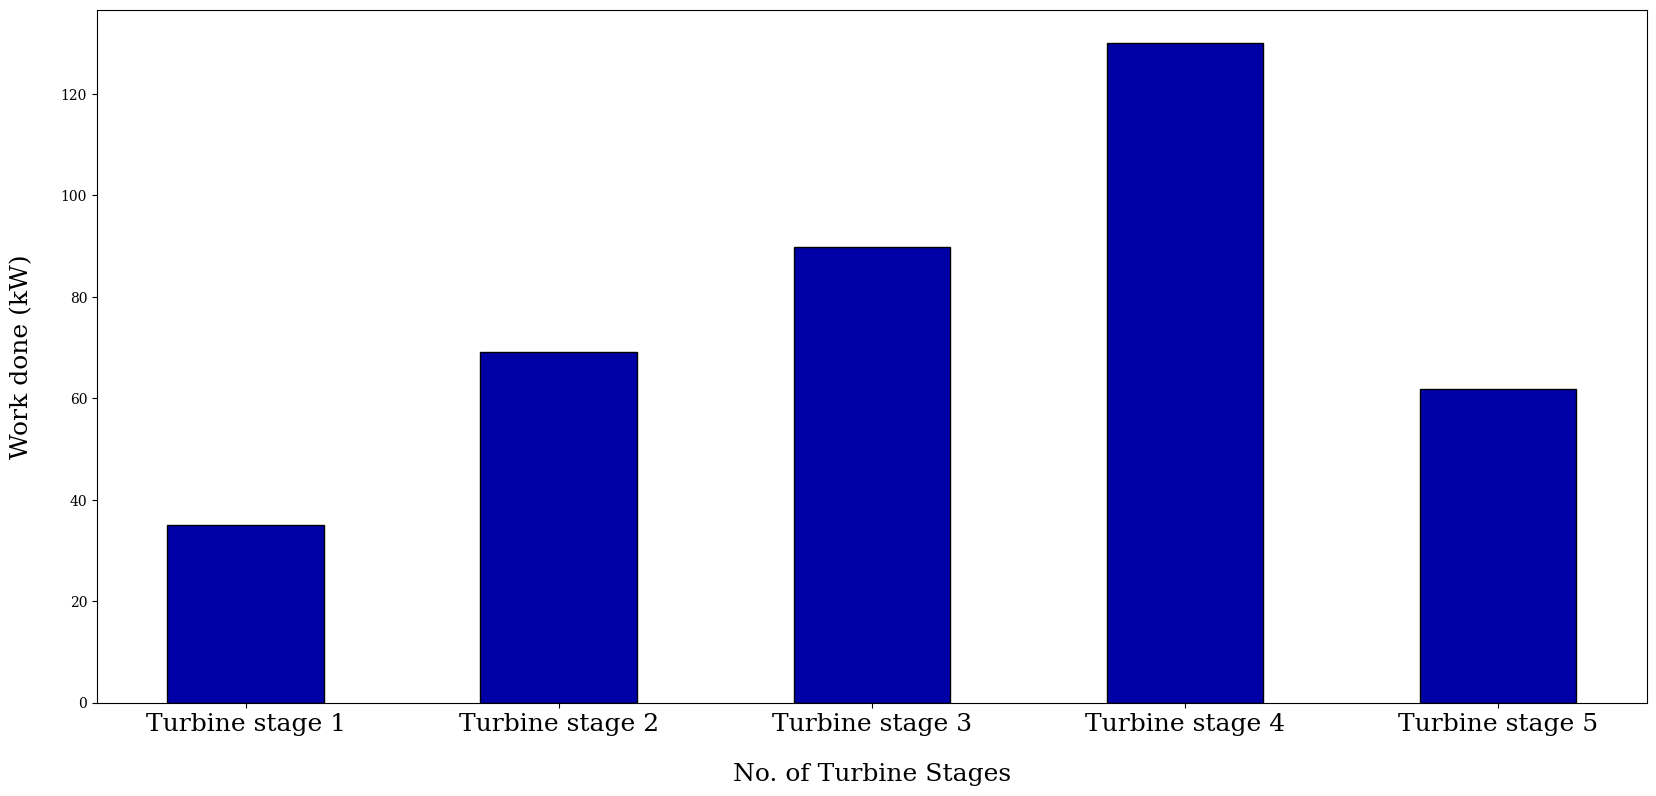

In [ ]:
plt.figure(figsize=(20,9))
plt.bar(x=dfwt['Turbine no'], height=dfwt['Work done'],color='#0000a7',edgecolor='black',width=0.5 )
# plt.title('Work done of Turbine',fontsize=20)
ax1 = plt.subplot()
ax1.set_xticks(dfwt['Turbine no'])
ax1.set_xticklabels(['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4','Turbine stage 5'],fontsize=18)

plt.xlabel('No. of Turbine Stages',fontsize=18,labelpad=20)
plt.ylabel('Work done (kW)',fontsize=18,labelpad=20)
plt.savefig('/content/Figure/Work Done of Turbine.jpg')

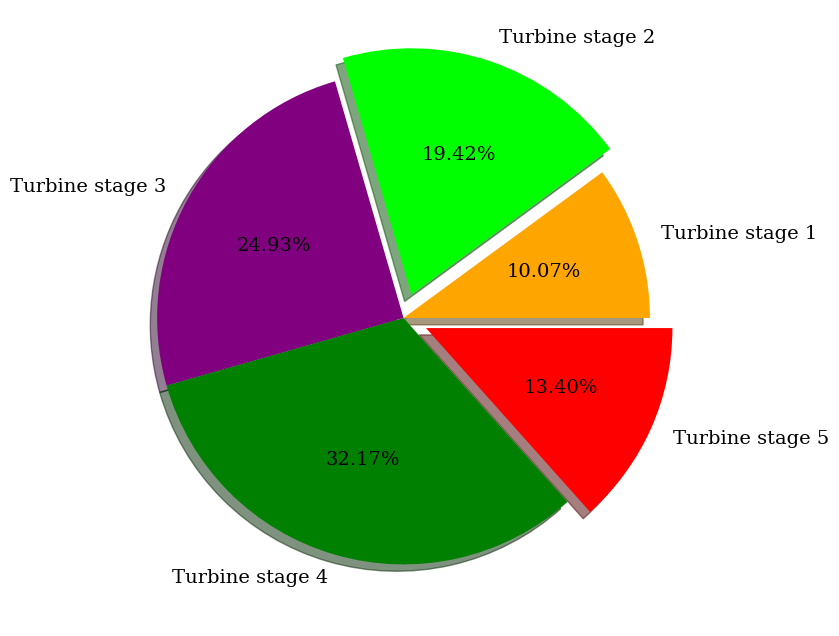

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(dfwt['Exergy Destruction'], autopct='%0.2f%%', explode=(0,0.1,0,0,0.1), labels=['Turbine stage 1','Turbine stage 2','Turbine stage 3','Turbine stage 4','Turbine stage 5'], colors=['orange','lime','purple','green','red'],shadow=True, textprops={'fontsize':14}  ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Turbine Pie.png')
plt.show()

###**All Point Plot and Table**

In [ ]:
#PCM exergy destruction
pcm=pd.DataFrame()
pcm1=air.h(Tc2+273,Pc2)-air.h(Tc3+273,Pc3)-Ta*(air.s(Tc2+273,Pc2)-air.s(Tc3+273,Pc3))-(air.h(Tt20+273,Pt20)-air.h(Tt19+273,Pt19)-Ta*(air.s(Tt20+273,Pt20)-air.s(Tt19+273,Pt19)))
pcm2=air.h(Tc4+273,Pc4)-air.h(Tc5+273,Pc5)-Ta*(air.s(Tc3+273,Pc3)-air.s(Tc5+273,Pc5))-(air.h(Tt18+273,Pt18)-air.h(Tt17+273,Pt17)-Ta*(air.s(Tt18+273,Pt18)-air.s(Tt17+273,Pt17)))
pcm3=air.h(Tc6+273,Pc6)-air.h(Tc7+273,Pc7)-Ta*(air.s(Tc6+273,Pc6)-air.s(Tc7+273,Pc7))-(air.h(Tt16+273,Pt16)-air.h(Tt15+273,Pt15)-Ta*(air.s(Tt16+273,Pt16)-air.s(Tt15+273,Pt15)))
pcm4=air.h(Tc8+273,Pc8)-air.h(Tc9+273,Pc9)-Ta*(air.s(Tc8+273,Pc8)-air.s(Tc9+273,Pc9))-(air.h(Tt14+273,Pt14)-air.h(Tt13+273,Pt13)-Ta*(air.s(Tt14+273,Pt14)-air.s(Tt13+273,Pt13)))


In [ ]:
#Efficiency
Efficiency=(dfwt['Work done'].sum(axis=0)/dfwc['Work done'].sum(axis=0))*100
Efficiency

59.59476730400377

In [ ]:
exergy_compressor=sum(dfwc['Exergy Destruction'])
exergy_turbine=sum(dfwt['Exergy Destruction'])
exergy_pcm=pcm1[0]+pcm2[0]+pcm3[0]+pcm4[0]
exergy_throttle=ex_dth[0]

In [ ]:
Loss=100-Efficiency
total_exergy=exergy_total['Exergy'].sum()
System_ed=(total_exergy/Loss)*Efficiency
System_ed

832.4446411258712

In [ ]:
name=[['Compressor'],['Turbine'],['TES'],['Throttle Valve'],['System']]
exergy_total=pd.DataFrame([exergy_compressor,exergy_turbine,exergy_pcm,exergy_throttle,System_ed])
exergy_total=pd.concat([pd.DataFrame(name),exergy_total],axis=1)
exergy_total.columns=['Component','Exergy']
exergy_total

,Component,Exergy
0,Compressor,47.346983
1,Turbine,34.707450
2,TES,96.363739
3,Throttle Valve,49.627828
4,System,832.444641


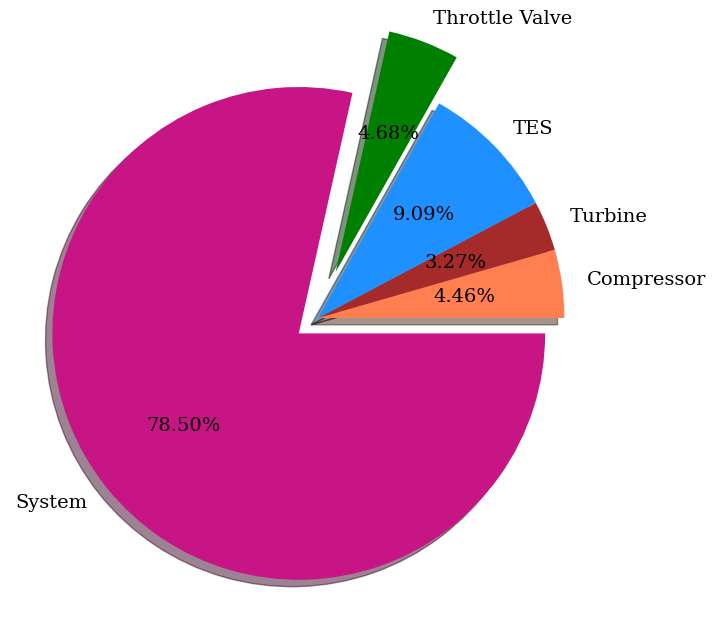

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(exergy_total['Exergy'], autopct='%0.2f%%', explode=(0,0,0,0.2,0.1), labels=['Compressor','Turbine','TES','Throttle Valve','System'], colors=['coral','brown','dodgerblue','green','mediumvioletred'],textprops={'fontsize':14},shadow=True ,radius=1)
plt.savefig('/content/Figure/Exergy Destruction of Components Pie.png')
plt.show()

In [ ]:
df_total = pd.concat([dfc, dfcv, dft], ignore_index=True, sort=False)
df_total

,point,Temperature,Pressure
0,1.0,25.000000,1.013000
1,2.0,255.545841,6.078000
2,3.0,68.080000,6.077350
3,4.0,276.494436,27.348075
4,5.0,67.130000,27.347425
5,6.0,180.833310,68.368562
6,7.0,68.600000,68.367912
7,8.0,151.698435,136.735825
8,9.0,68.520000,136.735175
9,10.0,68.520000,129.898416


In [ ]:
df_total.to_csv("/content/Figure/Table of Temperature and Pressure.csv")

**Zipping folder and Download**

In [ ]:
!zip -r /content/file.zip /content/Figure

updating: content/Figure/ (stored 0%)
updating: content/Figure/Work Done of Turbine.jpg (deflated 64%)
updating: content/Figure/Work Done of Compressor.jpg (deflated 67%)
updating: content/Figure/Exergy Destruction of Components Pie.png (deflated 6%)
updating: content/Figure/Exergy Destruction of Compressor Pie.png (deflated 9%)
updating: content/Figure/Exergy Destruction of Turbine.jpg (deflated 65%)
updating: content/Figure/Exergy Destruction of Turbine Pie.png (deflated 8%)
updating: content/Figure/Exergy Destruction of Compressor.jpg (deflated 64%)
updating: content/Figure/Table of Temperature and Pressure (deflated 52%)
  adding: content/Figure/Table of Temperature and Pressure.csv (deflated 52%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pm.config

     config_file : ['/usr/local/lib/python3.10/dist-packages/pyromat/...
  config_verbose : False
         dat_dir : ['/usr/local/lib/python3.10/dist-packages/pyromat/data']
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
         def_oob : nan
           def_p : 1.01325
   error_verbose : True
     install_dir : '/usr/local/lib/python3.10/dist-packages/pyromat'
         reg_dir : ['/usr/local/lib/python3.10/dist-packages/pyromat/...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.4'
 warning_verbose : True